In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as smt

In [3]:
data=pd.read_csv('TataMotorsFinal.csv')
data

Date    Open    High     Low    Last   Close    Volume  \
0     2016-01-01  392.50  403.00  373.00  401.80  401.90   4377363   
1     2016-01-04  400.00  400.10  375.05  376.15  377.05   7822660   
2     2016-01-05  381.05  382.45  372.10  373.00  374.45   6901068   
3     2016-01-06  374.25  375.50  364.60  365.00  365.90   7211230   
4     2016-01-07  356.25  358.00  338.10  344.80  343.55  11782307   
...          ...     ...     ...     ...     ...     ...       ...   
1481  2021-12-27  465.70  472.45  460.10  472.45  471.15  12557565   
1482  2021-12-28  475.20  482.80  472.65  480.35  480.20  22860916   
1483  2021-12-29  478.75  481.60  474.25  474.75  476.00  10263884   
1484  2021-12-30  472.55  476.40  468.60  472.10  470.40  11923961   
1485  2021-12-31  472.70  483.60  471.85  482.80  482.40  15541446   

      Total Traded     MA50      MA200   returns  Cumulative Return  
0     1.718115e+09      NaN        NaN       NaN                NaN  
1     3.129064e+09      NaN        NaN -0.061831           0.938169  
2     2.629652e+09      NaN        NaN -0.006896           0.931699  
3     2.698803e+09      NaN        NaN -0.022833           0.910425  
4     4.197447e+09      NaN        NaN -0.061082           0.854815  
...            ...      ...        ...       ...                ...  
1481  5.848058e+09  488.014  358.62425  0.007592           1.172307  
1482  1.086351e+10  487.666  359.39950  0.019208           1.194825  
1483  4.913834e+09  486.994  360.17325 -0.008746           1.184374  
1484  5.634668e+09  486.764  360.94925 -0.011765           1.170440  
1485  7.346442e+09  486.674  361.75400  0.025510           1.200299  

[1486 rows x 12 columns]

In [5]:
data.head()

Date    Open    High     Low    Last   Close    Volume  Total Traded  \
0  2016-01-01  392.50  403.00  373.00  401.80  401.90   4377363  1.718115e+09   
1  2016-01-04  400.00  400.10  375.05  376.15  377.05   7822660  3.129064e+09   
2  2016-01-05  381.05  382.45  372.10  373.00  374.45   6901068  2.629652e+09   
3  2016-01-06  374.25  375.50  364.60  365.00  365.90   7211230  2.698803e+09   
4  2016-01-07  356.25  358.00  338.10  344.80  343.55  11782307  4.197447e+09   

   MA50  MA200   returns  Cumulative Return  
0   NaN    NaN       NaN                NaN  
1   NaN    NaN -0.061831           0.938169  
2   NaN    NaN -0.006896           0.931699  
3   NaN    NaN -0.022833           0.910425  
4   NaN    NaN -0.061082           0.854815

In [7]:
data.tail()

Date    Open    High     Low    Last   Close    Volume  \
1481  2021-12-27  465.70  472.45  460.10  472.45  471.15  12557565   
1482  2021-12-28  475.20  482.80  472.65  480.35  480.20  22860916   
1483  2021-12-29  478.75  481.60  474.25  474.75  476.00  10263884   
1484  2021-12-30  472.55  476.40  468.60  472.10  470.40  11923961   
1485  2021-12-31  472.70  483.60  471.85  482.80  482.40  15541446   

      Total Traded     MA50      MA200   returns  Cumulative Return  
1481  5.848058e+09  488.014  358.62425  0.007592           1.172307  
1482  1.086351e+10  487.666  359.39950  0.019208           1.194825  
1483  4.913834e+09  486.994  360.17325 -0.008746           1.184374  
1484  5.634668e+09  486.764  360.94925 -0.011765           1.170440  
1485  7.346442e+09  486.674  361.75400  0.025510           1.200299

In [8]:
data.shape

(1486, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1486 non-null   object 
 1   Open               1486 non-null   float64
 2   High               1486 non-null   float64
 3   Low                1486 non-null   float64
 4   Last               1486 non-null   float64
 5   Close              1486 non-null   float64
 6   Volume             1486 non-null   int64  
 7   Total Traded       1486 non-null   float64
 8   MA50               1437 non-null   float64
 9   MA200              1287 non-null   float64
 10  returns            1485 non-null   float64
 11  Cumulative Return  1485 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 139.4+ KB


In [11]:
data.describe()

Open         High          Low         Last        Close  \
count  1486.000000  1486.000000  1486.000000  1486.000000  1486.000000   
mean    302.856023   307.317093   297.713324   302.146030   302.155686   
std     138.134514   139.303847   136.635922   137.836427   137.860571   
min      66.500000    66.900000    63.500000    65.450000    65.300000   
25%     173.550000   176.812500   170.375000   173.500000   173.525000   
50%     307.875000   312.650000   303.050000   307.825000   307.700000   
75%     429.050000   434.262500   423.762500   427.925000   428.162500   
max     590.750000   598.400000   584.000000   589.250000   588.700000   

             Volume  Total Traded         MA50        MA200      returns  \
count  1.486000e+03  1.486000e+03  1437.000000  1287.000000  1485.000000   
mean   3.049267e+07  7.020363e+09   298.444207   288.023096     0.000560   
std    3.627145e+07  8.801617e+09   135.501787   130.895096     0.029683   
min    6.229990e+05  3.341767e+08    78.027000   115.888750    -0.175827   
25%    7.599902e+06  2.659617e+09   174.487000   162.201250    -0.013637   
50%    1.599862e+07  4.145796e+09   308.001000   263.528750     0.000375   
75%    4.090814e+07  7.816404e+09   421.025000   425.967750     0.013737   
max    3.905778e+08  9.352275e+10   545.218000   498.706500     0.204467   

       Cumulative Return  
count        1485.000000  
mean            0.751651  
std             0.343077  
min             0.162478  
25%             0.431699  
50%             0.765613  
75%             1.065937  
max             1.464792

In [14]:
data.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
Volume                 0
Total Traded           0
MA50                  49
MA200                199
returns                1
Cumulative Return      1
dtype: int64

In [15]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1481    False
1482    False
1483    False
1484    False
1485    False
Length: 1486, dtype: bool

In [16]:
data[data.duplicated()]

Empty DataFrame
Columns: [Date, Open, High, Low, Last, Close, Volume, Total Traded, MA50, MA200, returns, Cumulative Return]
Index: []

In [18]:
mean_ma50=data['MA50'].mean()
mean_ma50

298.4442066805845

In [20]:
mean_ma200=data['MA200'].mean()
mean_ma200

288.0230957653457

In [22]:
mean_return=data['returns'].mean()
mean_return

0.0005596584355932021

In [24]:
mean_cumulative=data['Cumulative Return'].mean()
mean_cumulative

0.7516509542635454

In [25]:
data.fillna({'MA50':mean_ma50,'MA200':mean_ma200,'returns':mean_return,'Cumulative Return':mean_cumulative},inplace=True)

In [27]:
data.isnull().sum()


Date                 0
Open                 0
High                 0
Low                  0
Last                 0
Close                0
Volume               0
Total Traded         0
MA50                 0
MA200                0
returns              0
Cumulative Return    0
dtype: int64

In [29]:
data

Date    Open    High     Low    Last   Close    Volume  \
0     2016-01-01  392.50  403.00  373.00  401.80  401.90   4377363   
1     2016-01-04  400.00  400.10  375.05  376.15  377.05   7822660   
2     2016-01-05  381.05  382.45  372.10  373.00  374.45   6901068   
3     2016-01-06  374.25  375.50  364.60  365.00  365.90   7211230   
4     2016-01-07  356.25  358.00  338.10  344.80  343.55  11782307   
...          ...     ...     ...     ...     ...     ...       ...   
1481  2021-12-27  465.70  472.45  460.10  472.45  471.15  12557565   
1482  2021-12-28  475.20  482.80  472.65  480.35  480.20  22860916   
1483  2021-12-29  478.75  481.60  474.25  474.75  476.00  10263884   
1484  2021-12-30  472.55  476.40  468.60  472.10  470.40  11923961   
1485  2021-12-31  472.70  483.60  471.85  482.80  482.40  15541446   

      Total Traded        MA50       MA200   returns  Cumulative Return  
0     1.718115e+09  298.444207  288.023096  0.000560           0.751651  
1     3.129064e+09  298.444207  288.023096 -0.061831           0.938169  
2     2.629652e+09  298.444207  288.023096 -0.006896           0.931699  
3     2.698803e+09  298.444207  288.023096 -0.022833           0.910425  
4     4.197447e+09  298.444207  288.023096 -0.061082           0.854815  
...            ...         ...         ...       ...                ...  
1481  5.848058e+09  488.014000  358.624250  0.007592           1.172307  
1482  1.086351e+10  487.666000  359.399500  0.019208           1.194825  
1483  4.913834e+09  486.994000  360.173250 -0.008746           1.184374  
1484  5.634668e+09  486.764000  360.949250 -0.011765           1.170440  
1485  7.346442e+09  486.674000  361.754000  0.025510           1.200299  

[1486 rows x 12 columns]

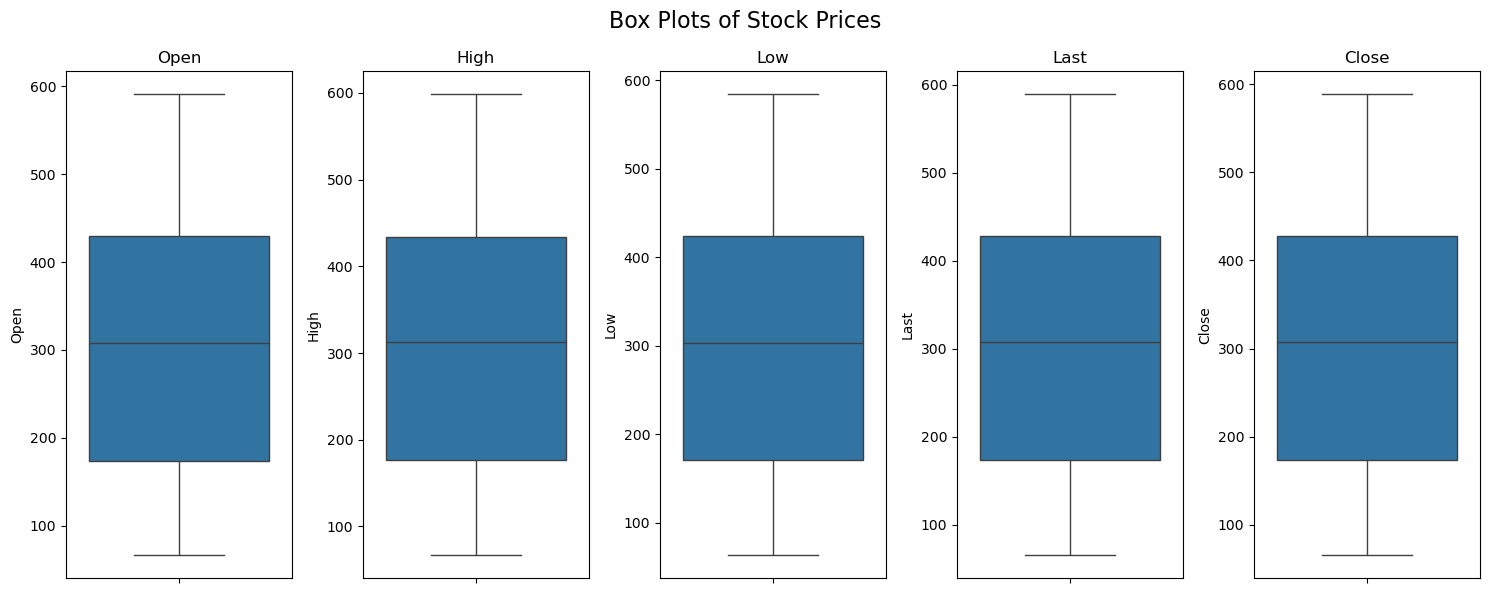

In [30]:
f,axes=plt.subplots(1,5,figsize=(15,6))
sns.boxplot(y='Open',data=data,ax=axes[0])
axes[0].set_title('Open')
sns.boxplot(y='High',data=data,ax=axes[1])
axes[1].set_title('High')
sns.boxplot(y='Low',data=data,ax=axes[2])
axes[2].set_title('Low')
sns.boxplot(y='Last',data=data,ax=axes[3])
axes[3].set_title('Last')
sns.boxplot(y='Close',data=data,ax=axes[4])
axes[4].set_title('Close')
plt.suptitle('Box Plots of Stock Prices',fontsize=16)
plt.tight_layout()

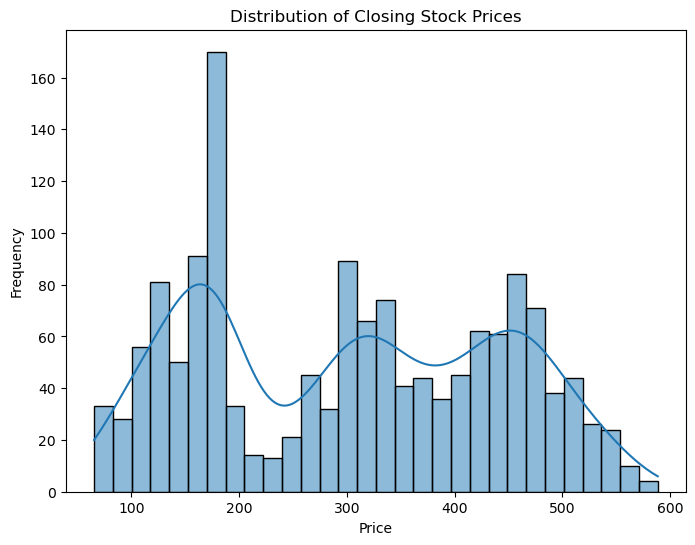

In [32]:
# Plot the distribution of the closing stock price
plt.figure(figsize=(8, 6))
sns.histplot(data['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

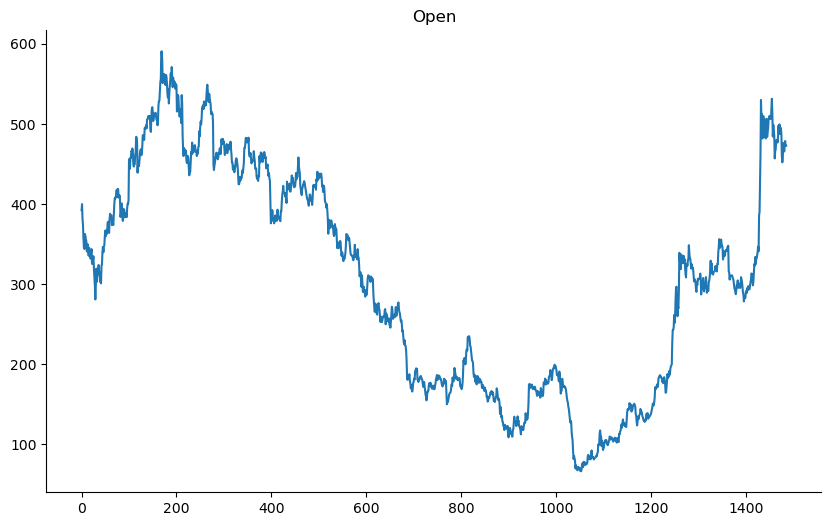

In [33]:
data['Open'].plot(kind='line', figsize=(10, 6), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

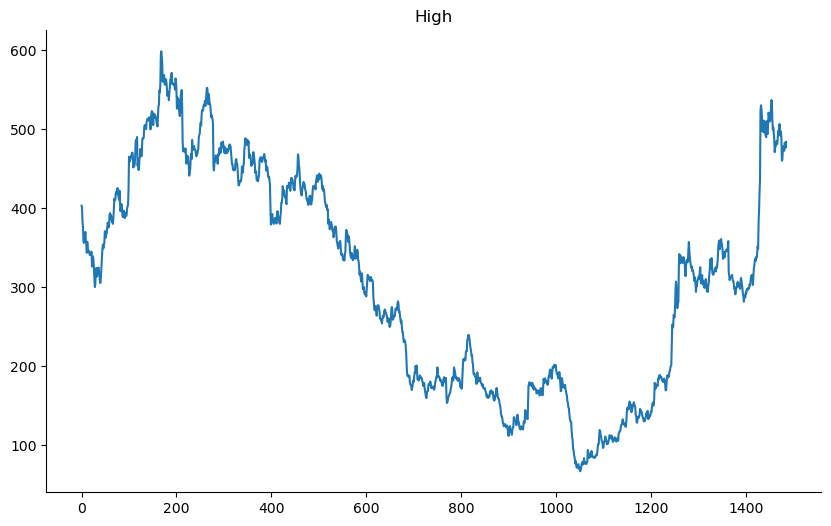

In [36]:
data['High'].plot(kind='line', figsize=(10, 6), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

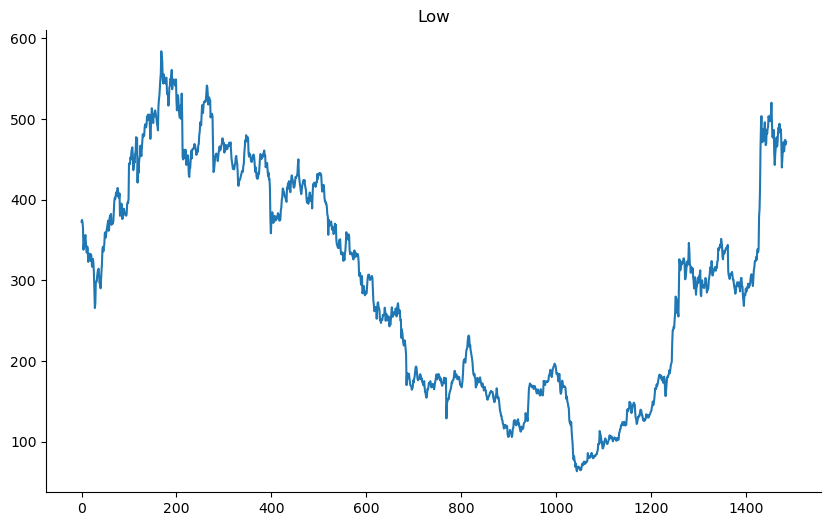

In [37]:
data['Low'].plot(kind='line', figsize=(10, 6), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)


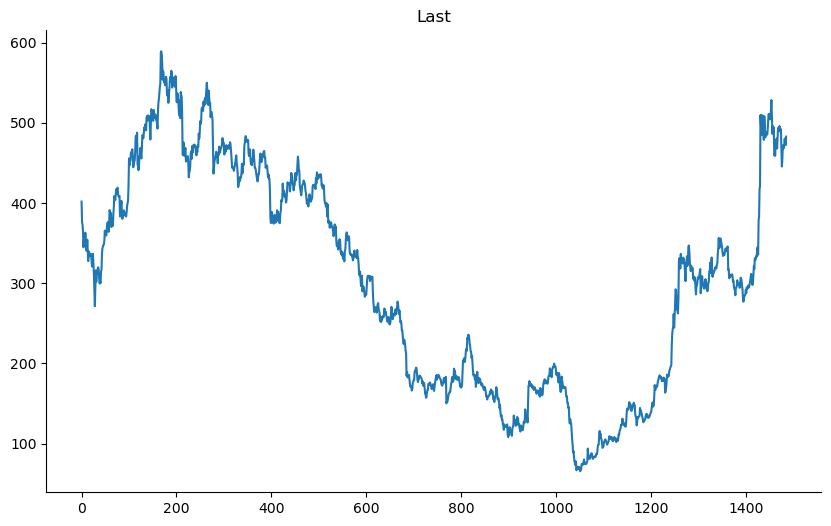

In [39]:
data['Last'].plot(kind='line', figsize=(10, 6), title='Last')
plt.gca().spines[['top', 'right']].set_visible(False)

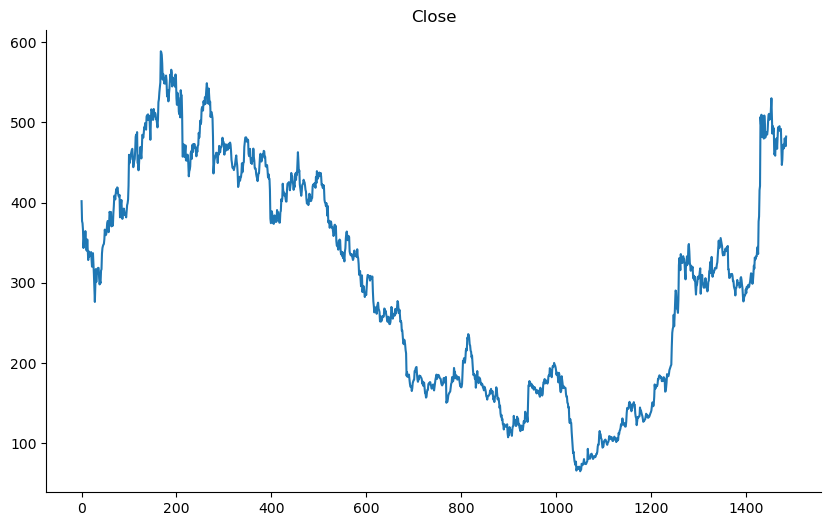

In [40]:
data['Close'].plot(kind='line', figsize=(10, 6), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [42]:

figure = go.Figure(data=[go.Candlestick(x=data['Date'], open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'])])
figure.update_layout(title='Tata Motors Stock Price', xaxis_rangeslider_visible=False)
figure.show()

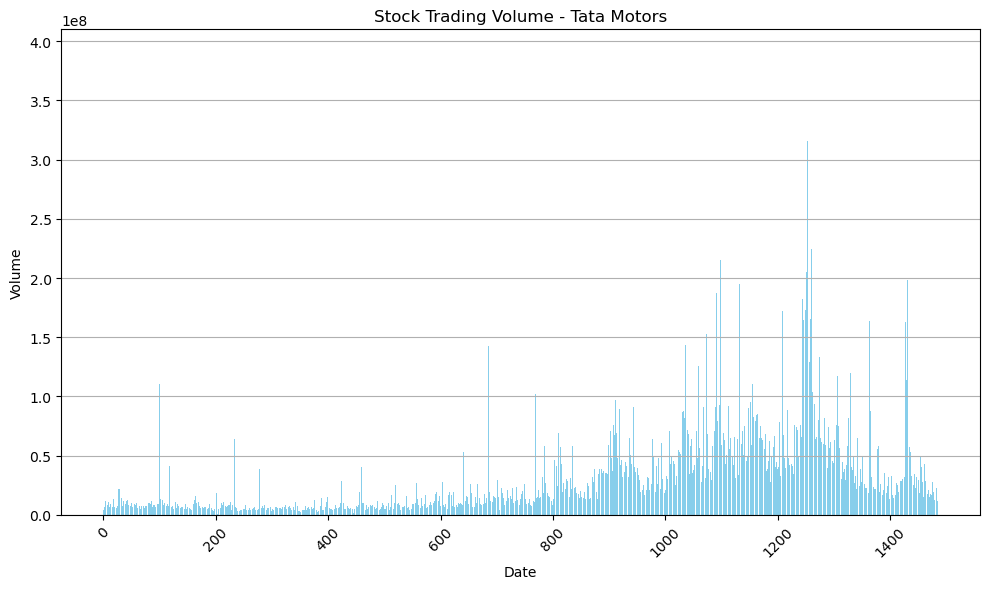

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['Volume'], color='skyblue')
plt.title('Stock Trading Volume - Tata Motors')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

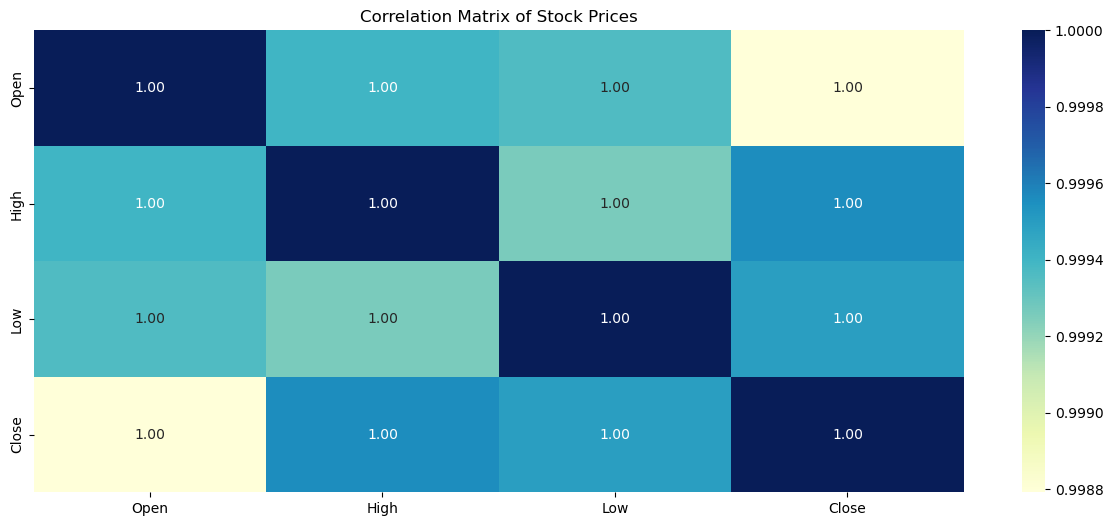

In [44]:
# Calculate the correlation matrix
correlation_matrix = data[['Open', 'High', 'Low', 'Close']].corr()

# Plot a heatmap of correlations
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix of Stock Prices')
plt.show()


In [45]:
# Calculate Mooving Average
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

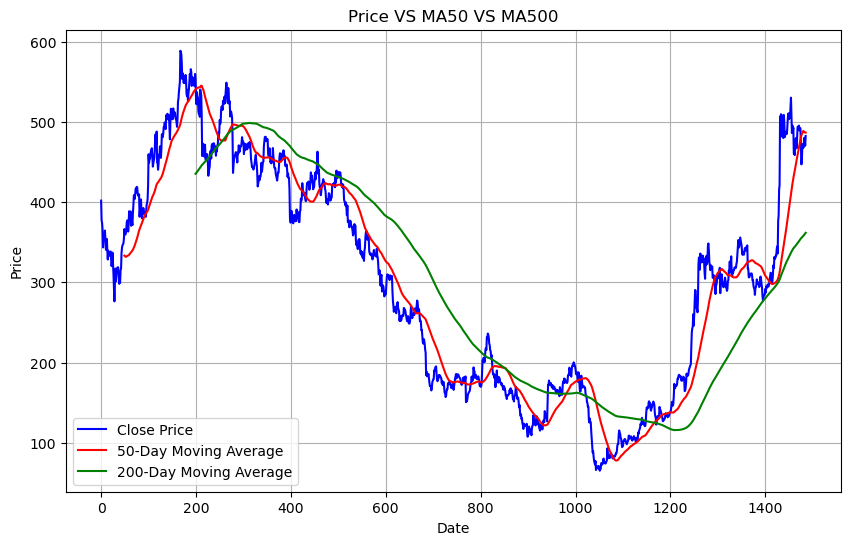

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA50'], label='50-Day Moving Average', color='red')
plt.plot(data['MA200'], label='200-Day Moving Average', color='green')
plt.title('Price VS MA50 VS MA500')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


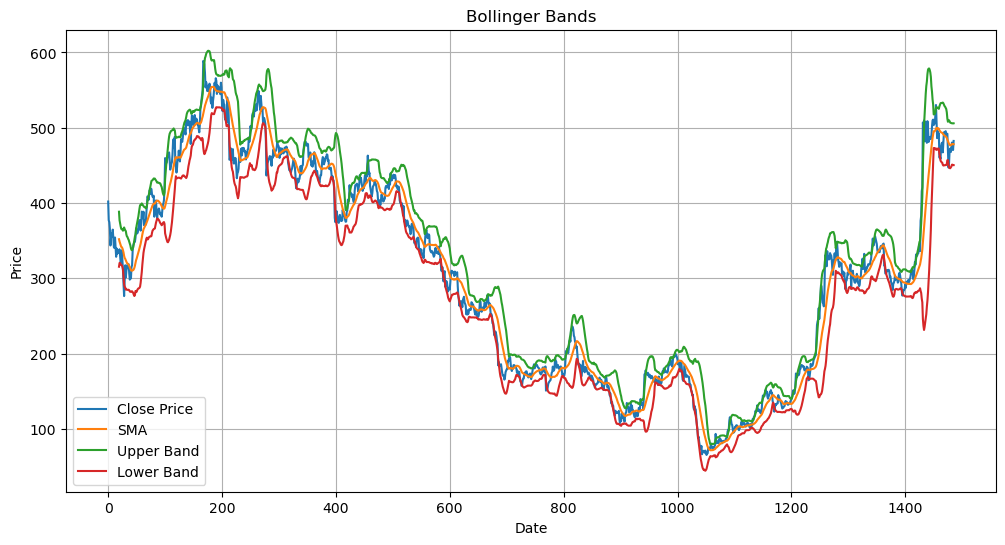

In [47]:
# Calculate Bollinger Bands
data['SMA'] = data['Close'].rolling(window=20).mean()
data['StdDev'] = data['Close'].rolling(window=20).std()
data['Upper'] = data['SMA'] + 2 * data['StdDev']
data['Lower'] = data['SMA'] - 2 * data['StdDev']

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper'], label='Upper Band')
plt.plot(data['Lower'], label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

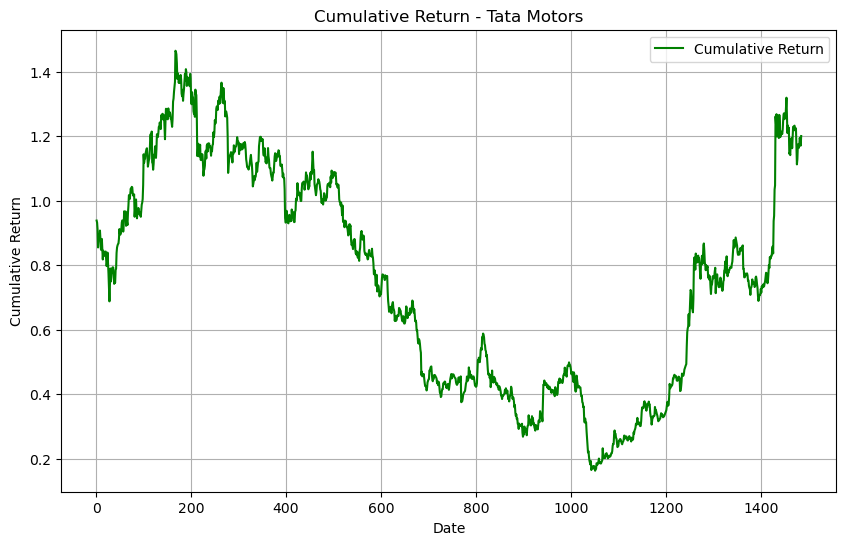

In [48]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Cumulative_Return'], label='Cumulative Return', color='green')
plt.title('Cumulative Return - Tata Motors')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

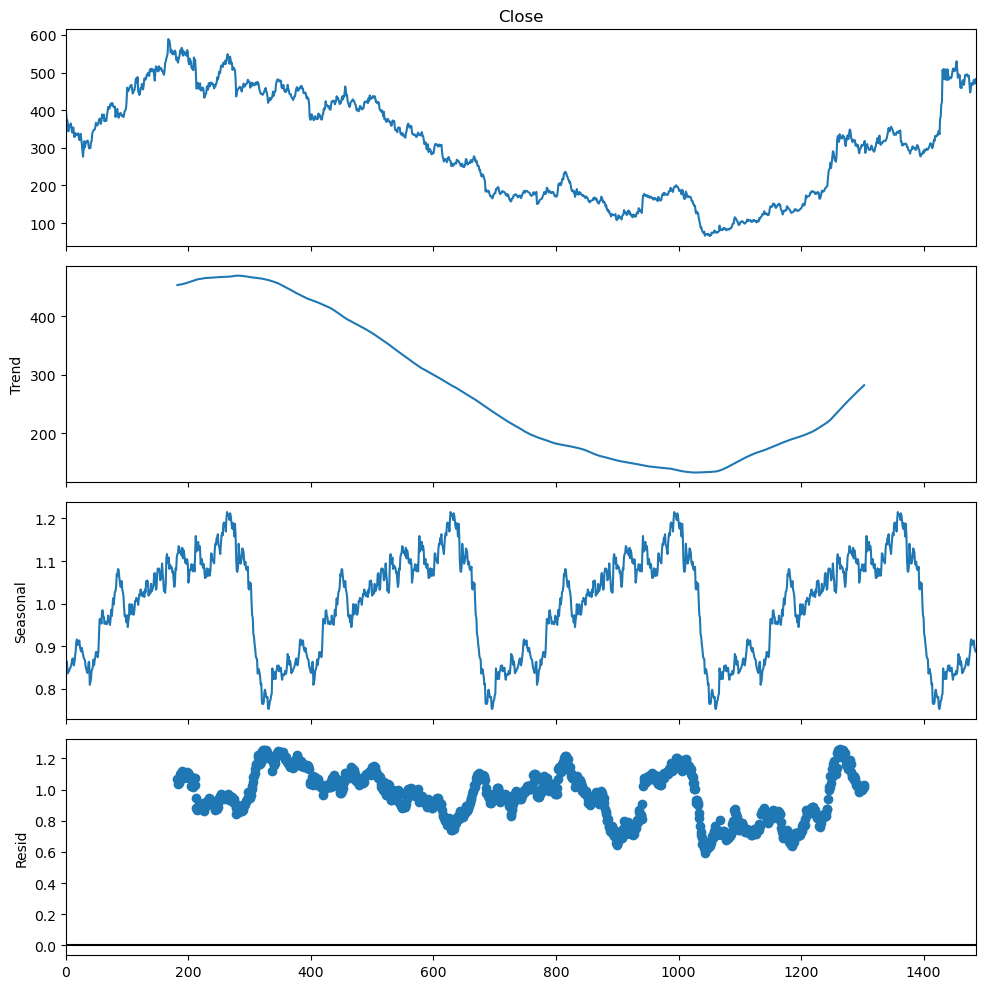

In [49]:
seasonal=seasonal_decompose(data['Close'],model='multiplicative',period=365)
plt.rcParams.update({'figure.figsize':(10,10)})
seasonal.plot()
plt.show()

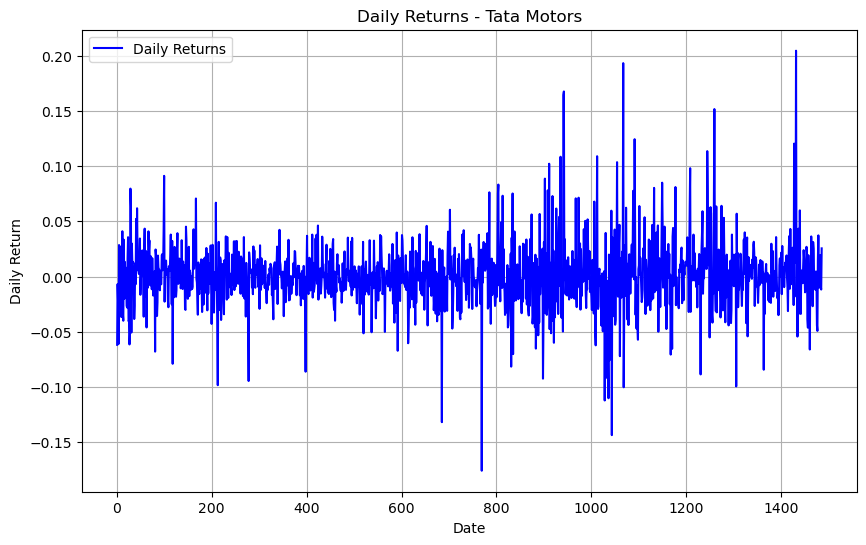

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(data['Daily_Return'], label='Daily Returns', color='blue')
plt.title('Daily Returns - Tata Motors')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

count    1485.000000
mean        0.000560
std         0.029683
min        -0.175827
25%        -0.013637
50%         0.000375
75%         0.013737
max         0.204467
Name: Daily_Return, dtype: float64


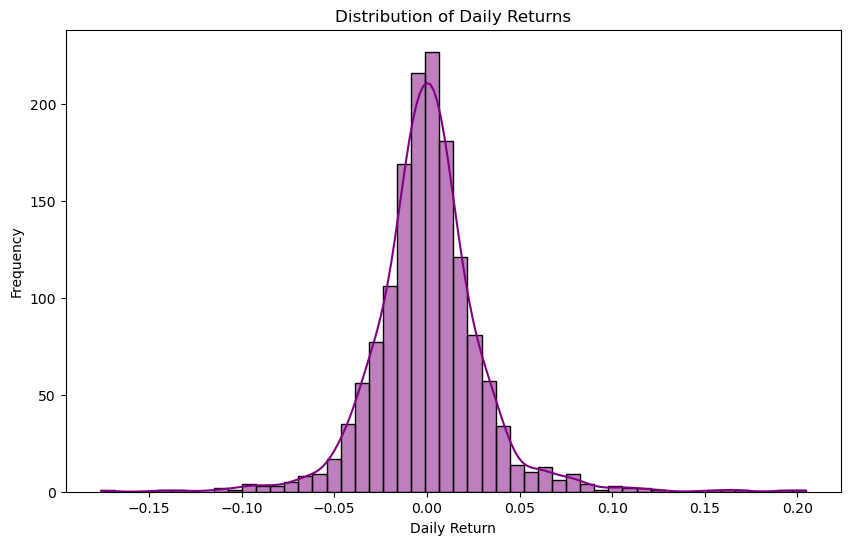

In [52]:
# Summary statistics of daily returns
print(data['Daily_Return'].describe())

# Plot distribution of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily_Return'], bins=50, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

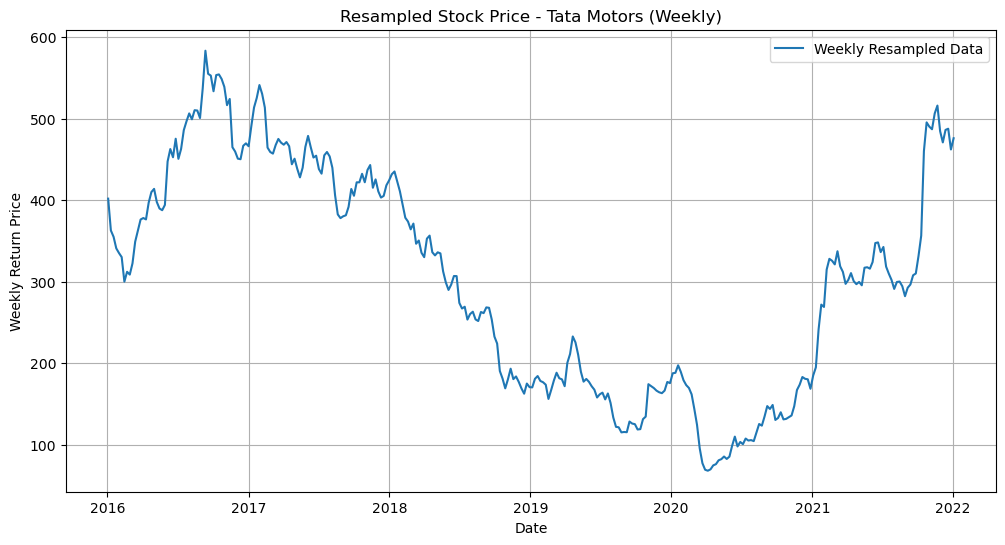

In [53]:
if 'Date' not in data.columns:
    data = data.reset_index()

# Convert the 'Date' column to DateTimeIndex
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

# Resample to weekly frequency and take the mean
data_weekly = data['Close'].resample('W').mean()


plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(data_weekly, label='Weekly Resampled Data')
plt.title('Resampled Stock Price - Tata Motors (Weekly)')
plt.xlabel('Date')
plt.ylabel('Weekly Return Price')
plt.legend()
plt.grid(True)
plt.show()

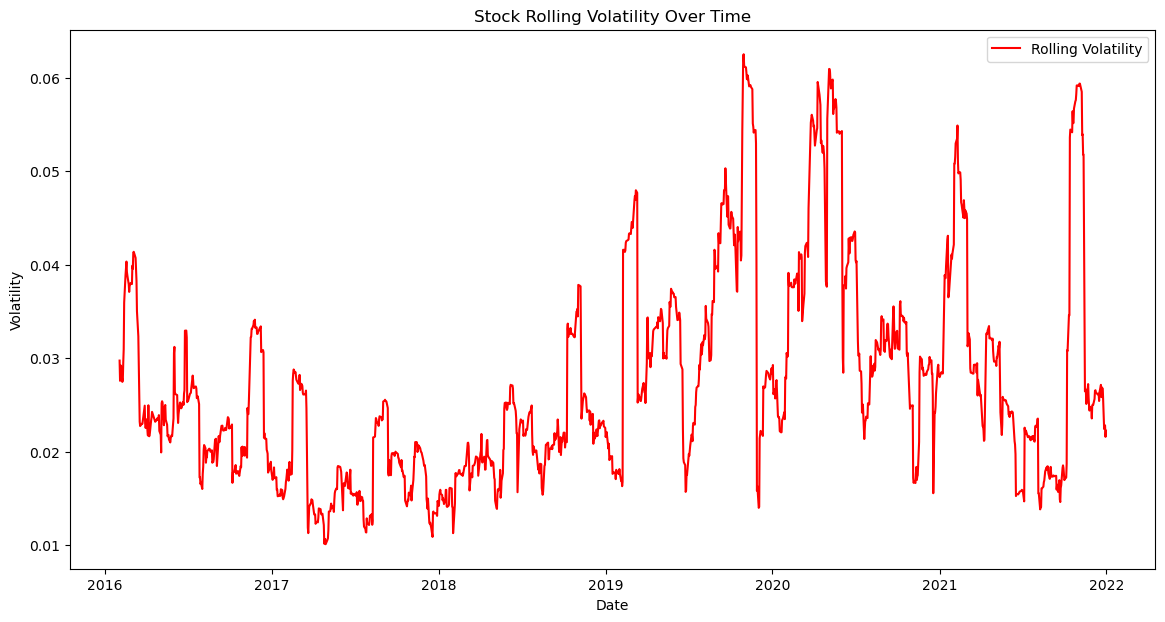

In [54]:
# Calculate rolling volatility (standard deviation of returns)
data['Volatility'] = data['Daily_Return'].rolling(window=21).std()

# Plot rolling volatility
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Volatility'], label='Rolling Volatility', color='red')
plt.title('Stock Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [56]:
# Model Building

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [57]:

data.dropna(inplace=True)
data.head()

Open    High     Low    Last   Close    Volume  Total Traded  \
Date                                                                         
2016-10-25  549.85  561.00  549.10  552.30  553.80   5690576  3.128963e+09   
2016-10-26  548.00  548.00  523.15  527.25  530.05   6665017  3.652429e+09   
2016-10-27  515.60  525.75  510.75  525.50  522.00  18470182  9.523226e+09   
2016-10-28  527.00  539.95  525.10  536.80  537.00   5665910  2.985935e+09   
2016-10-30  536.40  536.40  529.50  530.20  531.95    622999  3.341767e+08   

               MA50      MA200   returns  Cumulative Return       SMA  \
Date                                                                    
2016-10-25  540.544  435.30625 -0.010718           1.377955  547.8100   
2016-10-26  541.076  435.94700 -0.042886           1.318860  547.5475   
2016-10-27  541.451  436.67175 -0.015187           1.298831  547.0500   
2016-10-28  541.855  437.48450  0.028736           1.336153  546.9000   
2016-10-30  542.342  438.31475 -0.009404           1.323588  547.1825   

               StdDev       Upper       Lower  Daily_Return  \
Date                                                          
2016-10-25  10.631242  569.072485  526.547515     -0.010718   
2016-10-26  11.014303  569.576105  525.518895     -0.042886   
2016-10-27  11.941579  570.933159  523.166841     -0.015187   
2016-10-28  12.053117  571.006234  522.793766      0.028736   
2016-10-30  11.602680  570.387860  523.977140     -0.009404   

            Cumulative_Return  Volatility  
Date                                       
2016-10-25           1.377955    0.018310  
2016-10-26           1.318860    0.020472  
2016-10-27           1.298831    0.019533  
2016-10-28           1.336153    0.020530  
2016-10-30           1.323588    0.020363

In [58]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

X_train = train_data.drop('Close',axis=1)
y_train = train_data['Close']
X_test = test_data.drop('Close',axis=1)
y_test = test_data['Close']

In [60]:
std = MinMaxScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [61]:
data.isnull().sum()

Open                 0
High                 0
Low                  0
Last                 0
Close                0
Volume               0
Total Traded         0
MA50                 0
MA200                0
returns              0
Cumulative Return    0
SMA                  0
StdDev               0
Upper                0
Lower                0
Daily_Return         0
Cumulative_Return    0
Volatility           0
dtype: int64

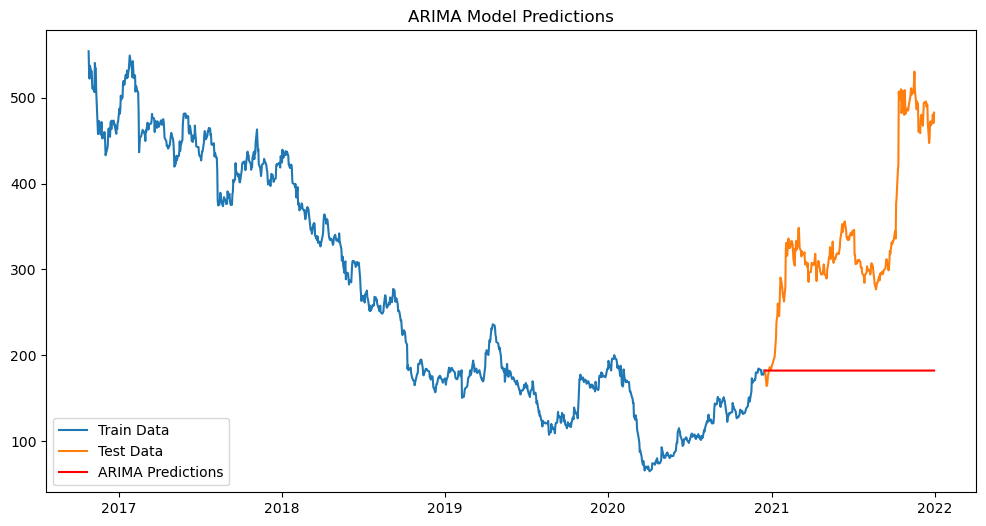

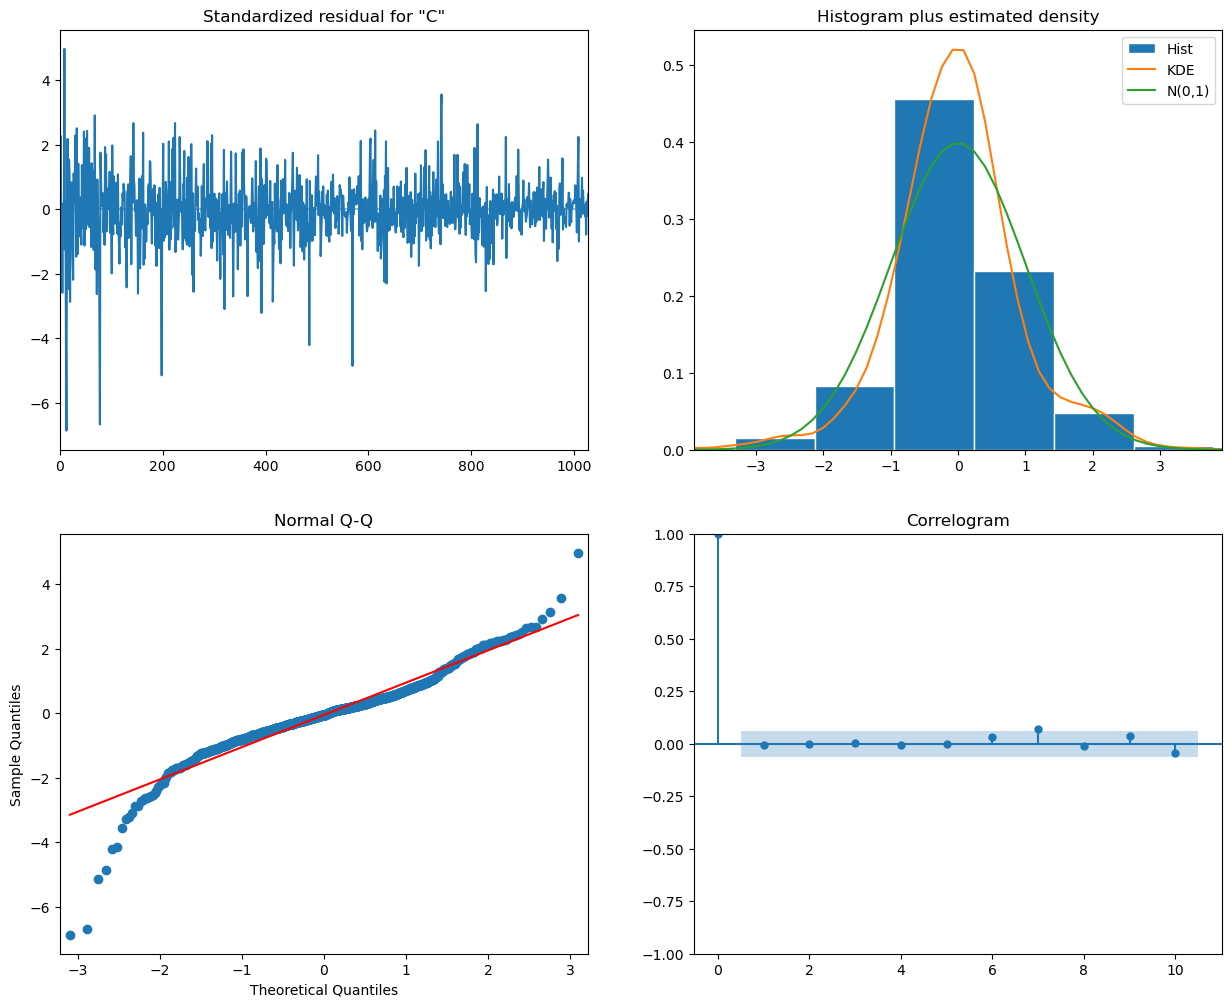

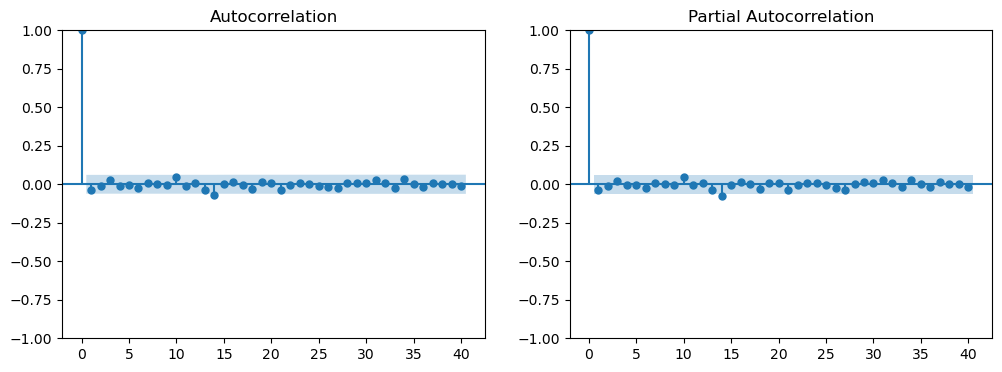

In [62]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# ... (your code for loading and preparing data)

# ARIMA model with parameters (p=5, d=1, q=0)
model = ARIMA(train_data['Close'], order=(5, 1, 0))

# Fit the model
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))

# 1. Plot the Actual vs. Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(train_data['Close'], label='Train Data')
plt.plot(test_data['Close'], label='Test Data')
plt.plot(test_data.index, predictions, label='ARIMA Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()

# 2. Plot the Model Diagnostics
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

# 3. Plot the ACF and PACF of Residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = model_fit.resid

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(residuals, lags=40, ax=axes[0])
plot_pacf(residuals, lags=40, ax=axes[1])
plt.show()

RMSE: 34.500295454540314


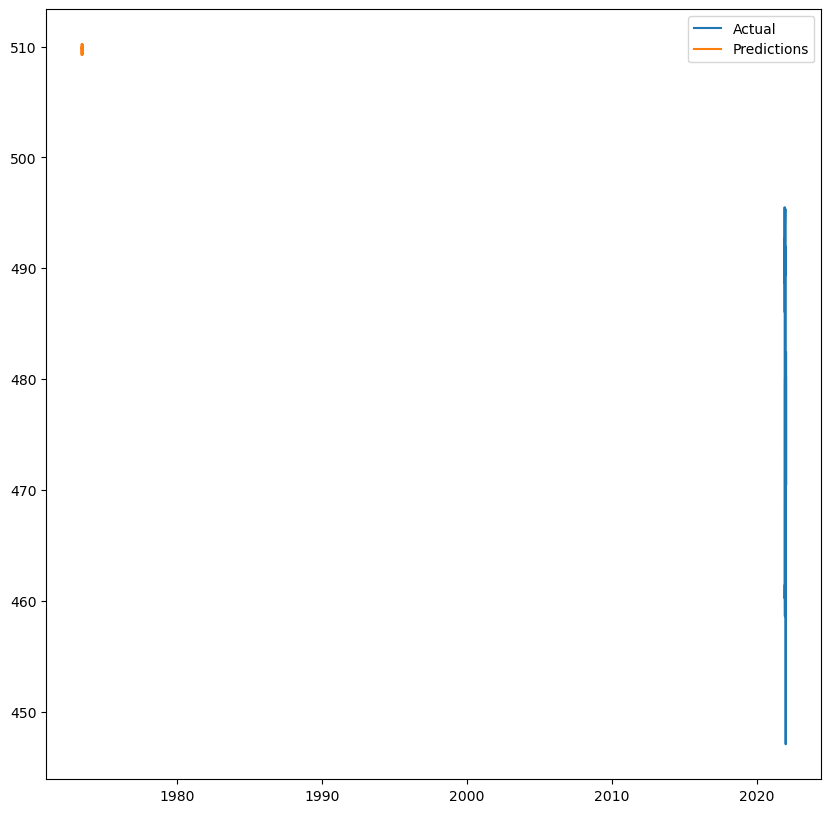

In [64]:
# Exponential Smoothing


from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


# Reset the index to bring 'Date' back as a column
data = data.reset_index()

# Make sure 'Date' is of datetime type
data['Date'] = pd.to_datetime(data['Date'])  

# Set 'Date' as index again
data.set_index('Date', inplace=True) 

y = data['Close']

# Split into training and testing sets:
train_data = y[:-30]  
test_data = y[-30:]   


model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7).fit()  

# 4. Make predictions and evaluate:
predictions = model.forecast(len(test_data))
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE:', rmse)

# 5. (Optional) Visualize predictions:
import matplotlib.pyplot as plt
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

In [65]:
!pip install prophet
from prophet import Prophet

In [67]:
!pip install statsmodels --upgrade  

RMSE: 12.774759029014524


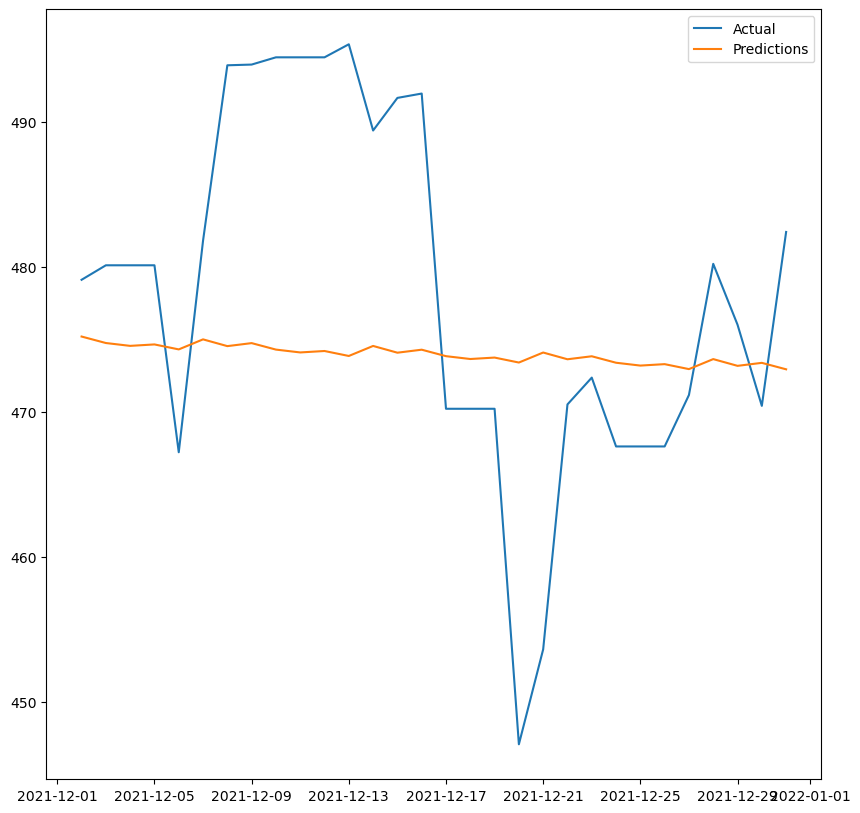

In [68]:


import pandas as pd
import numpy as np
from statsmodels.tsa.forecasting.theta import ThetaModel
from sklearn.metrics import mean_squared_error

# Load your data
data = pd.read_csv("TataMotorsFinal.csv") 

# Prepare the data
df = data[['Date', 'Close']].copy() 
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# **Force daily frequency to avoid potential issues with infer_freq**
df = df.asfreq('D')  

# Handle missing values before fitting the model
# **Fill NaNs with the previous valid value (forward fill)**
df['Close'] = df['Close'].ffill()

# Split the data into training and testing sets
train_data = df[:-30] 
test_data = df[-30:]

# Create and fit the Theta model
model = ThetaModel(train_data['Close'], method='multiplicative')
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test_data))

# Ensure predictions and test_data have the same index
predictions.index = test_data.index  

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
print(f'RMSE: {rmse}')

# Plot the results
import matplotlib.pyplot as plt
plt.plot(test_data['Close'], label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()



In [69]:
!pip install pmdarima statsmodels --upgrade


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[7]             : AIC=inf, Time=4.83 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=11197.144, Time=0.08 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=10796.262, Time=0.25 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=inf, Time=0.74 sec
 ARIMA(1,2,0)(0,0,0)[7]             : AIC=10794.263, Time=0.21 sec
 ARIMA(1,2,0)(0,0,1)[7]             : AIC=10796.262, Time=0.35 sec
 ARIMA(1,2,0)(1,0,1)[7]             : AIC=10798.262, Time=0.34 sec
 ARIMA(2,2,0)(0,0,0)[7]             : AIC=10635.697, Time=0.21 sec
 ARIMA(2,2,0)(1,0,0)[7]             : AIC=10637.242, Time=0.63 sec
 ARIMA(2,2,0)(0,0,1)[7]             : AIC=10637.221, Time=0.50 sec
 ARIMA(2,2,0)(1,0,1)[7]             : AIC=inf, Time=2.49 sec
 ARIMA(3,2,0)(0,0,0)[7]             : AIC=10553.416, Time=0.35 sec
 ARIMA(3,2,0)(1,0,0)[7]             : AIC=10555.185, Time=0.67 sec
 ARIMA(3,2,0)(0,0,1)[7]             : AIC=10555.185, Time=0.59 sec
 ARIMA(3,2,0)(1,0,1)[7]             :

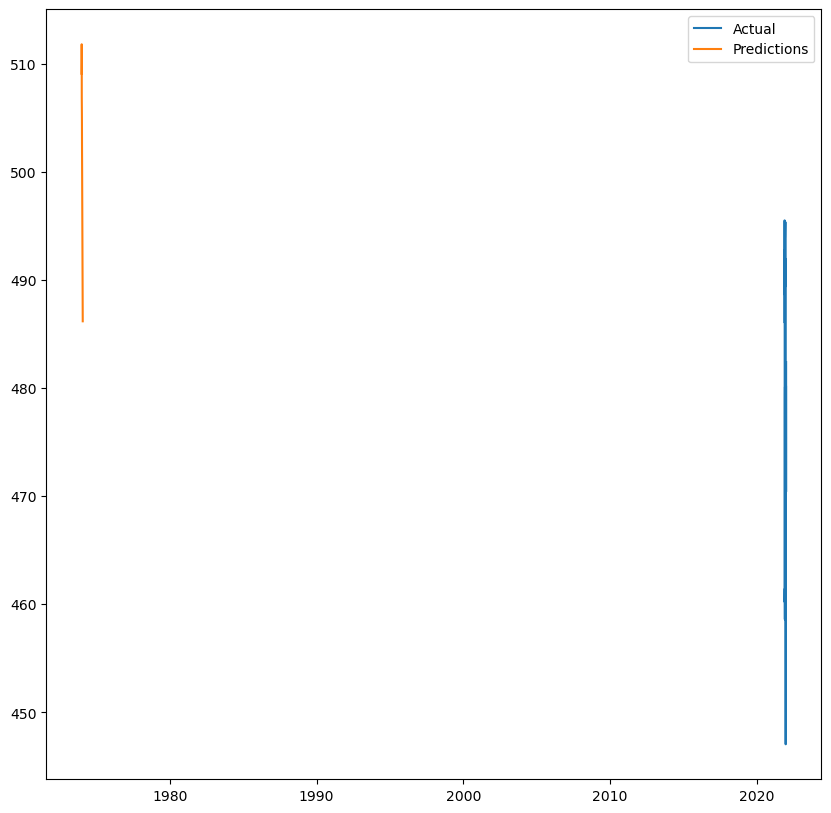

In [71]:


import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima

# Load your data
data = pd.read_csv("TataMotorsFinal.csv")

# Prepare the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
y = data['Close']

# Split into training and testing sets
train_data = y[:-30]
test_data = y[-30:]

# Find the optimal SARIMA order using auto_arima
# Set seasonal=True and provide the seasonal period (e.g., m=12 for monthly data)
model_auto = auto_arima(
    train_data, 
    seasonal=True, 
    m=7, # Example: Assuming weekly seasonality 
    trace=True, 
    error_action='ignore', 
    suppress_warnings=True, 
    stepwise=True
)

# Get the optimal order (p, d, q) and seasonal order (P, D, Q, m)
order = model_auto.order
seasonal_order = model_auto.seasonal_order

# Build and train the SARIMA model
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(y)-1)

#Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE:', rmse)

import matplotlib.pyplot as plt
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

21:46:24 - cmdstanpy - INFO - Chain [1] start processing
21:46:25 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 53.76530915112165
MAE: 50.93252033661191
           date  predicted_price  lower_price  higher_price
0    2016-01-01       296.797668   262.536818    334.761269
1    2016-01-04       305.246977   267.911388    342.725746
2    2016-01-05       308.316562   270.732303    348.661606
3    2016-01-06       310.052461   272.664061    349.393014
4    2016-01-07       313.108751   276.947948    350.730568
...         ...              ...          ...           ...
1481 2021-12-14       436.104862   396.687105    474.575748
1482 2021-12-15       436.684277   402.651892    475.970351
1483 2021-12-16       438.712807   401.264334    477.045925
1484 2021-12-17       440.552383   403.791170    479.552704
1485 2021-12-18       425.041917   386.412387    461.870000

[1486 rows x 4 columns]


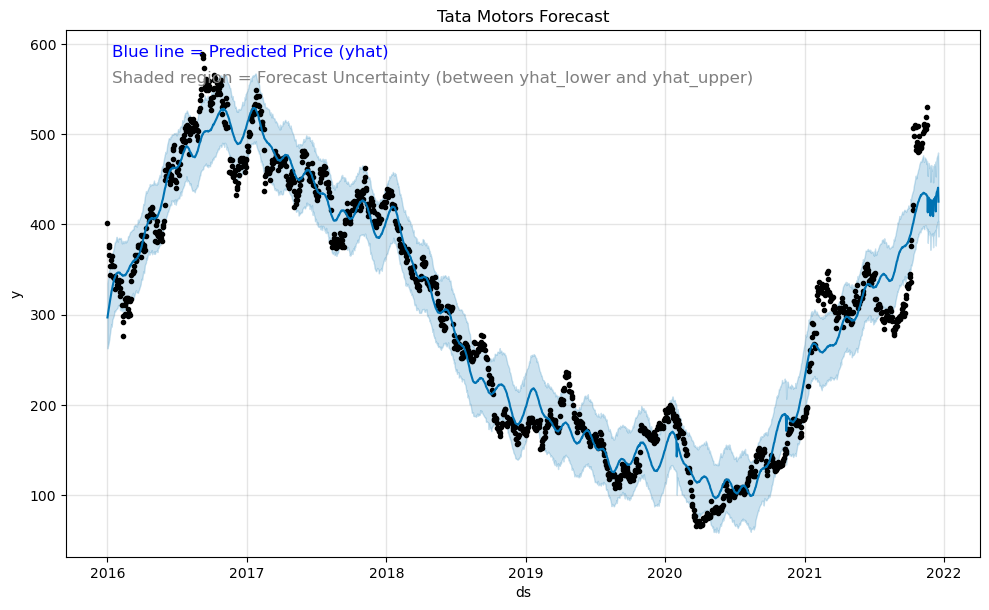

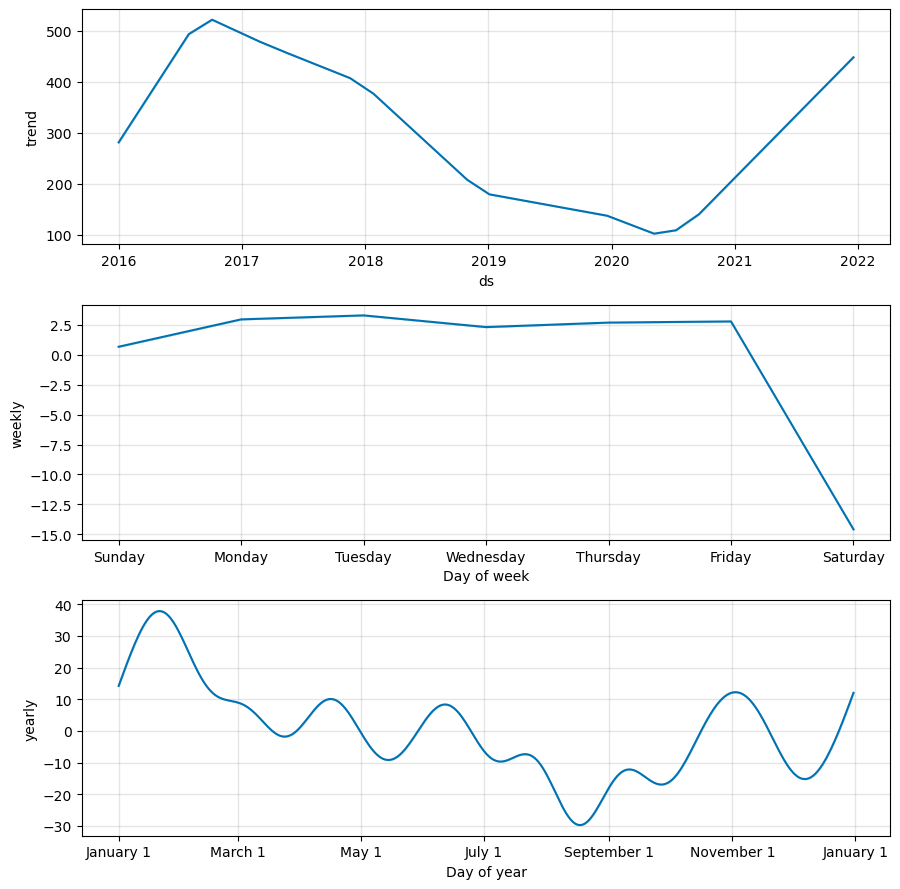

In [135]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv("TataMotorsFinal.csv")

# Prepare the data for Prophet
df = data[['Date', 'Close']].copy()
df.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for target
df['ds'] = pd.to_datetime(df['ds'])  # Make sure 'ds' is in datetime format

# Split data into train and test sets
train_df = df[:-30]  # Use data except for the last 30 days for training
test_df = df[-30:]   # Use the last 30 days for testing

# Create and fit the Prophet model
model = Prophet()
model.fit(train_df)

# Make predictions on the test set
future = model.make_future_dataframe(periods=30)  # Forecast for next 30 days
forecast = model.predict(future)

# Extract required columns and rename them
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast_df.columns = ['date', 'predicted_price', 'lower_price', 'higher_price']

# Evaluate the model
y_true = test_df['y'].values
y_pred = forecast['yhat'][-30:].values  # Get predictions for the test set period

rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Display the forecasted data
print(forecast_df)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Tata Motors Forecast')  # Add a title to the plot

# Add annotations to explain the graph
plt.text(0.05, 0.95, 'Blue line = Predicted Price (yhat)', transform=fig1.gca().transAxes, fontsize=12, color='blue')
plt.text(0.05, 0.90, 'Shaded region = Forecast Uncertainty (between yhat_lower and yhat_upper)', transform=fig1.gca().transAxes, fontsize=12, color='gray')

# Plot components (trend, seasonality, holidays)
fig2 = model.plot_components(forecast)

# Show the plot
plt.show()


In [137]:
import joblib
from prophet import Prophet
import pandas as pd

# Example: Training a simple Prophet model
data = {
    'ds': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'y': [100, 110, 120, 115]
}

df = pd.DataFrame(data)
df['ds'] = pd.to_datetime(df['ds'])

model = Prophet()
model.fit(df)

# Save the trained model to a file
joblib.dump(model, 'prophet_model.pkl')


21:47:33 - cmdstanpy - INFO - Chain [1] start processing
21:47:33 - cmdstanpy - INFO - Chain [1] done processing


['prophet_model.pkl']